# Diabetes Analysis and Visualization
Data source: Big Cities Health Inventory Data Platform. Big Cities Health Coalition, National Association of County and City Health Officials. http://www.bigcitieshealth.org/city-data accessed 9/1/2019. 

Import libraries and read in data.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
sns.set(font_scale=1.5,
    rc={'figure.figsize':(20,7)}
)
plt.style.use('ggplot')

In [3]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

In [4]:
df = pd.read_csv('BCHI-dataset_2019-03-04.csv')

## Exploratory data analysis and cleaning

I visualize the first and last five rows of the data using df.head() and df.tail(). I also use df.info() to show the data types and get an idea of how many null values are in each column. The column names are fairly self explanatory. 

In [5]:
df.head()

,Indicator Category,Indicator,Year,Sex,Race/Ethnicity,Value,Place,BCHC Requested Methodology,Source,Methods,Notes,90% Confidence Level - Low,90% Confidence Level - High,95% Confidence Level - Low,95% Confidence Level - High
0,Behavioral Health/Substance Abuse,Opioid-Related Unintentional Drug Overdose Mor...,2010,Both,All,1.7,"Washington, DC",Age-Adjusted rate of opioid-related mortality ...,"D.C. Department of Health, Center for Policy, ...",NaN,This indicator is not exclusive of other drugs...,NaN,NaN,NaN,NaN
1,Behavioral Health/Substance Abuse,Opioid-Related Unintentional Drug Overdose Mor...,2010,Both,All,2.2,"Fort Worth (Tarrant County), TX",Age-adjusted rate of opioid-related mortality ...,National Center for Health Statistics,NaN,This indicator is not exclusive of other drugs...,NaN,NaN,1.5,3.0
2,Behavioral Health/Substance Abuse,Opioid-Related Unintentional Drug Overdose Mor...,2010,Both,All,2.3,"Oakland (Alameda County), CA",Age-adjusted rate of opioid-related mortality ...,CDC Wonder,Age-adjusted rate of opioid-related mortality ...,Data is for Alameda County. This indicator is ...,NaN,NaN,1.6,3.2
3,Behavioral Health/Substance Abuse,Opioid-Related Unintentional Drug Overdose Mor...,2010,Both,All,3.0,"San Antonio, TX",Age-adjusted rate of opioid-related mortality ...,CDC Wonder,NaN,This indicator is not exclusive of other drugs...,NaN,NaN,2.2,3.9
4,Behavioral Health/Substance Abuse,Opioid-Related Unintentional Drug Overdose Mor...,2010,Both,All,4.4,"U.S. Total, U.S. Total",Age-Adjusted rate of opioid-related mortality ...,CDC WONDER,NaN,This indicator is not exclusive of other drugs...,NaN,NaN,4.4,4.5


In [6]:
df.tail()

,Indicator Category,Indicator,Year,Sex,Race/Ethnicity,Value,Place,BCHC Requested Methodology,Source,Methods,Notes,90% Confidence Level - Low,90% Confidence Level - High,95% Confidence Level - Low,95% Confidence Level - High
34487,Social and Economic Factors,Percent Unemployed,2014,Male,All,9.7,"Chicago, Il",Percent of unemployment among population 16 an...,"US Census Bureau, American Community Survey 1-...",NaN,Population 20 to 64 years; Place=Chicago was u...,9.1,10.3,NaN,NaN
34488,Social and Economic Factors,Percent Unemployed,2014,Male,All,13.3,"Baltimore, MD",Percent of unemployment among population 16 an...,"US Census Bureau, American Community Survey 1-...",NaN,Population 20 to 64 years; FIPS code 2404000 w...,11.8,14.8,NaN,NaN
34489,Social and Economic Factors,Percent Unemployed,2014,Male,All,14.0,"Philadelphia, PA",Percent of unemployment among population 16 an...,"US Census Bureau, American Community Survey 1-...",NaN,Population 20 to 64 years; FIPS code 4260000 w...,12.8,15.2,NaN,NaN
34490,Social and Economic Factors,Percent Unemployed,2014,Male,All,18.7,"Cleveland, OH",Percent of unemployment among population 16 an...,"US Census Bureau, American Community Survey 1-...",NaN,Population 20 to 64 years; FIPS code 3916000 w...,16.5,20.9,NaN,NaN
34491,Social and Economic Factors,Percent Unemployed,2014,Male,All,23.0,"Detroit, MI",Percent of unemployment among population 16 an...,"US Census Bureau, American Community Survey 1-...",NaN,Population 20 to 64 years; FIPS code 2622000 w...,21.0,25.0,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34492 entries, 0 to 34491
Data columns (total 15 columns):
Indicator Category             34492 non-null object
Indicator                      34492 non-null object
Year                           34492 non-null int64
Sex                            34492 non-null object
Race/Ethnicity                 34492 non-null object
Value                          31048 non-null float64
Place                          34492 non-null object
BCHC Requested Methodology     34492 non-null object
Source                         29528 non-null object
Methods                        7524 non-null object
Notes                          14641 non-null object
90% Confidence Level - Low     2837 non-null float64
90% Confidence Level - High    2837 non-null float64
95% Confidence Level - Low     8835 non-null float64
95% Confidence Level - High    8876 non-null float64
dtypes: float64(5), int64(1), object(9)
memory usage: 3.9+ MB


I drop the columns with information about how the data was obtained and confidence levels, and rename the columns so they are easier to use throughout the analysis. I can also drop any columns where the 'value' is null. 

In [8]:
df['Indicator'].unique()

array(['Opioid-Related Unintentional Drug Overdose Mortality Rate (Age-Adjusted; Per 100,000 people)',
       'Percent of Adults Who Binge Drank',
       'Percent of High School Students Who Binge Drank',
       'All Types of Cancer Mortality Rate (Age-Adjusted; Per 100,000 people)',
       'Female Breast Cancer Mortality Rate (Age-Adjusted; Per 100,000 people)',
       'Lung Cancer Mortality Rate (Age-Adjusted; Per 100,000 people)',
       'Asthma Emergency Department Visit Rate (Age-Adjusted; Per 10,000)',
       'Diabetes Mortality Rate (Age-Adjusted; Per 100,000 people)',
       'Heart Disease Mortality Rate (Age-Adjusted; Per 100,000 people)',
       'Percent of Adults Who Are Obese',
       'Percent of Adults Who Currently Smoke',
       'Percent of Adults Who Meet CDC-Recommended Physical Activity Levels',
       'Percent of High School Students Who Are Obese',
       'Percent of High School Students Who Currently Smoke',
       'Percent of High School Students Who Meet CDC-Reco

In [9]:
df = df.drop(['Indicator Category','BCHC Requested Methodology', 'Source', 'Methods',
       'Notes', '90% Confidence Level - Low', '90% Confidence Level - High',
       '95% Confidence Level - Low', '95% Confidence Level - High'], axis=1)

In [10]:
df.columns = ['indicator', 'year', 'sex', 'race', 'value', 'place']

In [11]:
df = df.dropna(subset=['value'])

Becuase I'm interested in diabetes across race, I pull a list of indicators with no data for specific races. These indicators only have data in the 'All' category. 

In [12]:
race_indicators = df.loc[df['race'] != 'All', 'indicator'].value_counts().index.to_list()
no_race_indicators = [x for x in df['indicator'].unique() if x not in race_indicators]

In [13]:
no_race_indicators

['Percent Foreign Born',
 'Percent of Population 65 and Over',
 'Percent of Population Under 18',
 'Percent Who Only Speak English at Home',
 'Percent Who Speak Spanish at Home',
 'Sex (Percent)',
 'Total Population (People)',
 'Bike Score',
 'Transit Score',
 'Walkability',
 'Median Household Income (Dollars)',
 'Percent Living Below 200% Poverty Level',
 'Percent of 3 and 4 Year Olds Currently Enrolled in Preschool',
 'Percent of Children Living in Poverty',
 'Percent of High School Graduates (Over Age 18)',
 'Percent of Households Whose Housing Costs Exceed 35% of Income']

## Diabetes data exploration and cleaning
I narrow the data to only show rows related to the Diabetes Mortality Rate (per 100,000 people), and review the number rows across year, race, and sex in order to get an idea of how complete the data is.  

In [14]:
diabetes = df[df['indicator'] == 'Diabetes Mortality Rate (Age-Adjusted; Per 100,000 people)']

In [15]:
diabetes['year'].value_counts()

2012    168
2011    166
2013    154
2010    141
2014    122
2015    107
2016     54
Name: year, dtype: int64

In [16]:
diabetes['race'].value_counts()

All                              420
White                            138
Black                            138
Hispanic                          96
Asian/PI                          73
American Indian/Alaska Native     22
Other                             17
Multiracial                        8
Name: race, dtype: int64

In [17]:
diabetes['sex'].value_counts()

Both      634
Male      140
Female    138
Name: sex, dtype: int64

In [18]:
diabetes.head()

,indicator,year,sex,race,value,place
4454,Diabetes Mortality Rate (Age-Adjusted; Per 100...,2010,Both,All,10.4,"Las Vegas (Clark County), NV"
4455,Diabetes Mortality Rate (Age-Adjusted; Per 100...,2010,Both,All,12.0,"San Francisco, CA"
4456,Diabetes Mortality Rate (Age-Adjusted; Per 100...,2010,Both,All,12.9,"Boston, MA"
4457,Diabetes Mortality Rate (Age-Adjusted; Per 100...,2010,Both,All,14.2,"Los Angeles, CA"
4458,Diabetes Mortality Rate (Age-Adjusted; Per 100...,2010,Both,All,16.3,"Phoenix, AZ"


In [19]:
diabetes.describe()

,year,value
count,912.000000,912.000000
mean,2012.533991,25.122917
std,1.796125,15.274026
min,2010.000000,0.000000
25%,2011.000000,16.800000
50%,2012.000000,22.400000
75%,2014.000000,29.625000
max,2016.000000,224.700000


## Data Analysis and Visualization

I use df.groupby() to show the average diabetes mortality rate across different racial/ethnic groups and genders. I also use a box plot to visualize the distribution of values. 

In [20]:
diabetes.groupby('race')[['race', 'value']].mean().sort_values('value', ascending=False)

,value
race,
American Indian/Alaska Native,52.695455
Black,39.514493
Multiracial,34.212500
Hispanic,24.813542
All,23.063571
Asian/PI,19.184932
White,17.386232
Other,9.264706


Text(0.5, 0, 'Race')

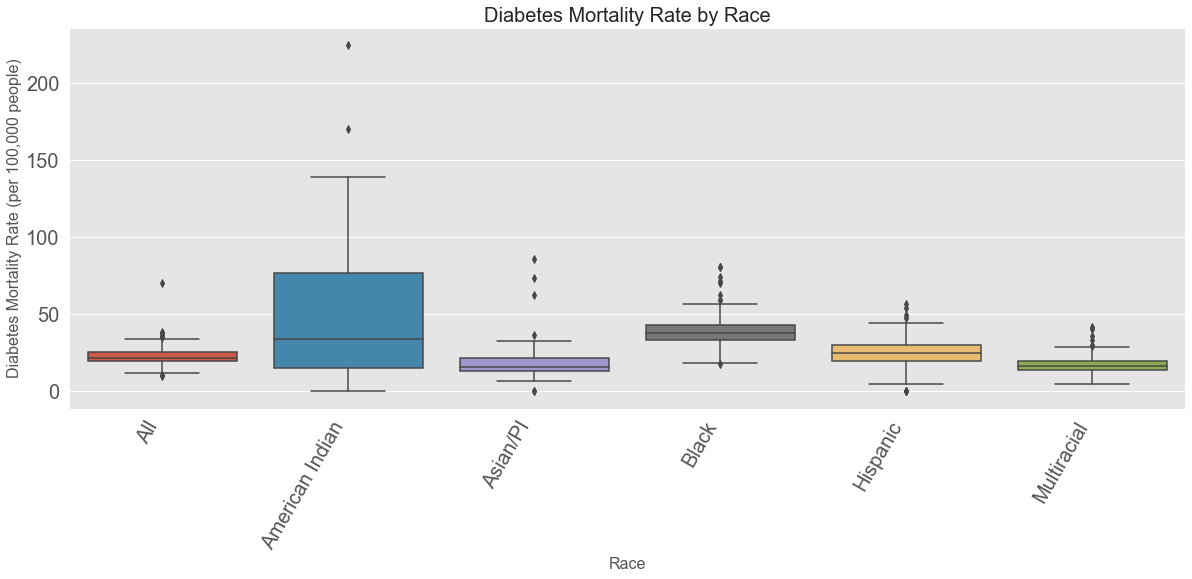

In [67]:
ax = sns.boxplot(x='race', y='value', data=diabetes)
ax.set_xticklabels(['All', 'American Indian', 'Asian/PI', 'Black', 'Hispanic', 'Multiracial', 'Other', 'White'], rotation=60, ha='right')
ax.axes.set_title('Diabetes Mortality Rate by Race', fontsize=20)
ax.set_ylabel('Diabetes Mortality Rate (per 100,000 people)', fontsize=16)
ax.set_xlabel('Race', fontsize=16)

In [22]:
diabetes.groupby('sex')[['sex', 'value']].mean().sort_values('value', ascending=False)

,value
sex,
Male,27.237857
Both,25.977603
Female,19.050725


[Text(0, 0, 'Both'), Text(0, 0, 'Female'), Text(0, 0, 'Male')]

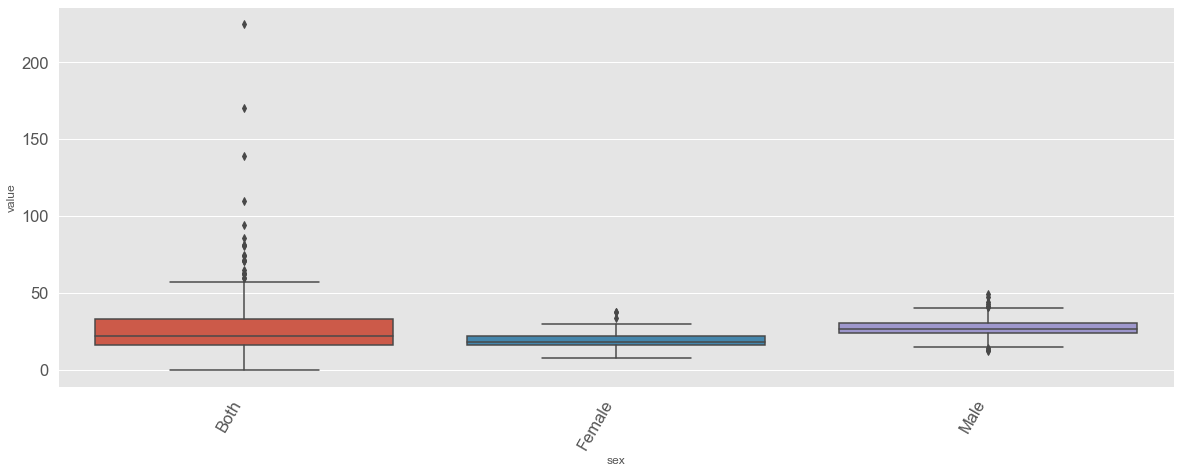

In [23]:
strp = sns.boxplot(x='sex', y='value', data=diabetes)
strp.set_xticklabels(strp.get_xticklabels(), rotation=60, ha='right')

In [24]:
diabetes.groupby('year').mean()

,value
year,
2010,22.459574
2011,23.444578
2012,27.158333
2013,24.891558
2014,24.809836
2015,25.802804
2016,30.924074


The Other and Multiracial categories have limited data so I remove those from the analysis. The gendered data is only availabe for the race category 'All', so I remove this as well. 

In [25]:
diabetes = diabetes[diabetes['sex'] == 'Both']
diabetes = diabetes[diabetes['race'] != 'Other']
diabetes = diabetes[diabetes['race'] != 'Multiracial']

In [26]:
diabetes = diabetes.drop(['sex', 'indicator'], axis=1)

### Diabetes mortality from 2010 to 2015

I narrow the data to only show the rows that reflect all of the US in order to identify patterns over time, and pivot the table so the rows are years and columns are the race.

In [27]:
diabetes_us = diabetes[diabetes['place'] == 'U.S. Total, U.S. Total']
diabetes_us = diabetes_us.drop('place', axis=1)

In [28]:
diabetes_us_piv = diabetes_us.pivot(index='year', columns='race', values='value')

In [29]:
diabetes_us_piv

race,All,American Indian/Alaska Native,Asian/PI,Black,Hispanic,White
year,,,,,,
2010,20.8,36.4,15.5,39.6,27.1,18.2
2011,21.6,36.5,15.9,40.6,27.2,19.1
2012,21.2,36.9,15.7,39.7,26.9,18.5
2013,21.2,34.1,15.8,39.5,26.3,18.6
2014,20.9,NaN,15.0,38.2,25.1,18.6
2015,21.3,34.2,15.7,37.0,25.2,18.9


Text(0.5, 1.0, 'Average Diabetes Mortality Rates in the US from 2010 to 2015')

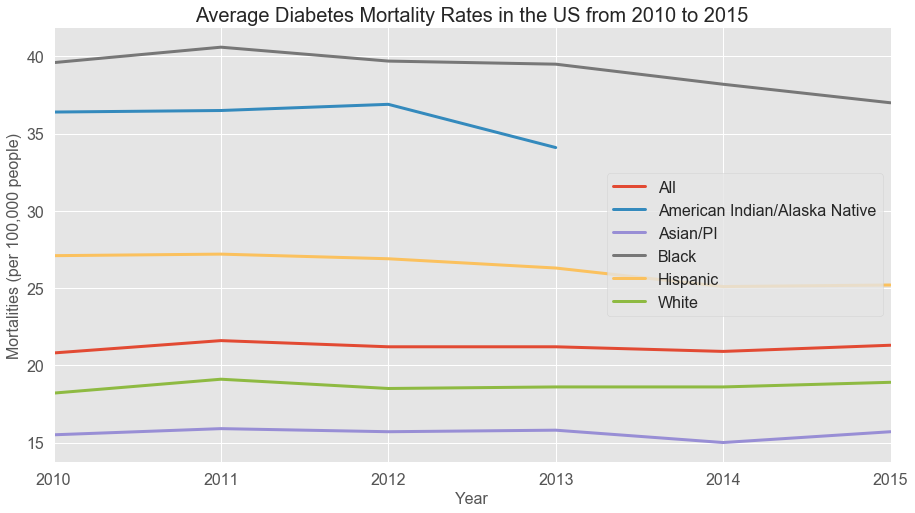

In [30]:
ax1=diabetes_us_piv.plot(kind='line', y=['All', 'American Indian/Alaska Native', 'Asian/PI', 'Black', 'Hispanic', 'White'], figsize=(15,8), linewidth=3, fontsize=16)

# Title, labels and legend
ax1.legend(labels=['All', 'American Indian/Alaska Native', 'Asian/PI', 'Black', 'Hispanic', 'White'],fontsize=16, loc=5)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Mortalities (per 100,000 people)',fontsize=16)
ax1.set_title('Average Diabetes Mortality Rates in the US from 2010 to 2015',fontsize=20)

We see that Black, Hispanic, and American Indian/Alaska Native populations have above average diabetes mortality rates, while White and Asian/PI people have below average rates. The data shows a recent decrease in mortalities due to diabetes in populations with above average diabetes mortality rates. 

### Diabetes mortality by city and race

To visualize the diabetes mortality rate by race across various US cities I pivot the table and average the values from 2010 to 2016 by city. 

In [31]:
db_pv = pd.pivot_table(diabetes, values = 'value', index=['place', 'race'], columns='year', aggfunc=np.sum)

In [32]:
db_pv['Average'] = db_pv.mean(axis=1).round(decimals=1)

In [33]:
db_pv = db_pv.drop([2010, 2011, 2012, 2013, 2014, 2015, 2016], axis=1)

In [34]:
db_avg = db_pv.reset_index()

In [35]:
db_avg.head()

year,place,race,Average
0,"Boston, MA",All,18.6
1,"Boston, MA",Black,33.2
2,"Boston, MA",Hispanic,25.6
3,"Boston, MA",White,15.4
4,"Chicago, Il",All,24.1


In [36]:
db_1 = db_avg.pivot(columns='race', values='Average')

In [37]:
db_1.head()

race,All,American Indian/Alaska Native,Asian/PI,Black,Hispanic,White
0,18.6,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,33.2,NaN,NaN
2,NaN,NaN,NaN,NaN,25.6,NaN
3,NaN,NaN,NaN,NaN,NaN,15.4
4,24.1,NaN,NaN,NaN,NaN,NaN


In [38]:
#merge to add place as index
db_clean = pd.merge(db_avg, db_1, how='outer', left_index=True, right_index=True)

In [39]:
db_clean.head()

,place,race,Average,All,American Indian/Alaska Native,Asian/PI,Black,Hispanic,White
0,"Boston, MA",All,18.6,18.6,NaN,NaN,NaN,NaN,NaN
1,"Boston, MA",Black,33.2,NaN,NaN,NaN,33.2,NaN,NaN
2,"Boston, MA",Hispanic,25.6,NaN,NaN,NaN,NaN,25.6,NaN
3,"Boston, MA",White,15.4,NaN,NaN,NaN,NaN,NaN,15.4
4,"Chicago, Il",All,24.1,24.1,NaN,NaN,NaN,NaN,NaN


In [40]:
#groupby to combine rows based on place
db_clean = db_clean.groupby(['place']).mean()

In [41]:
db_clean = db_clean.reset_index()
db_clean = db_clean.drop(['Average'], axis=1)

In [42]:
db_clean = db_clean.replace(0, np.nan)

In [43]:
db_clean = db_clean.dropna(thresh=6) 

In [44]:
california = ['Los Angeles, CA', 'Oakland (Alameda County), CA', 'San Francisco, CA', 'Long Beach, CA']
db_clean = db_clean[~db_clean['place'].isin(california)]

I plot the diabetes mortality rate by race across the 11 cities with complete data across races. 

In [45]:
db_clean = db_clean.replace('Las Vegas (Clark County), NV', 'Las Vegas, NV')
db_clean = db_clean.replace('U.S. Total, U.S. Total', 'U.S. Total')

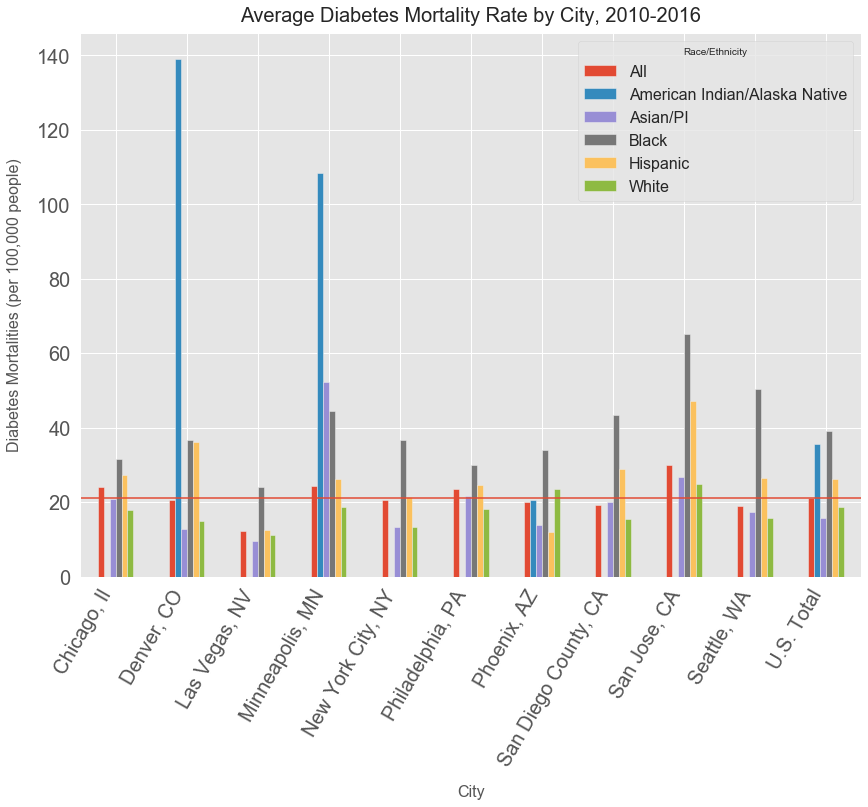

In [68]:
ax2 = db_clean[['All', 'American Indian/Alaska Native', 'Asian/PI', 'Black', 'Hispanic', 'White']].plot(kind='bar',figsize=(14, 10))

ax2.set_xticklabels(db_clean['place'].unique(), rotation=60, ha='right')
ax2.set_title('Average Diabetes Mortality Rate by City, 2010-2016', fontsize=20, y=1.01)
ax2.set_xlabel('City', labelpad=15, fontsize=16)
ax2.set_ylabel('Diabetes Mortalities (per 100,000 people)', labelpad=15, fontsize=16)
ax2.legend(['All', 'American Indian/Alaska Native', 'Asian/PI', 'Black', 'Hispanic', 'White'], fontsize=16, title="Race/Ethnicity")
ax2.axhline(diabetes.loc[(diabetes['place'] == 'U.S. Total, U.S. Total') & (diabetes['race'] == 'All'), 'value'].mean())

The diabetes mortality rate for the Black population is above the national average for all races in every city shown. The rate for the Hispanic population is above the national average for all races in more than half of cities shown. The rate for Asian/PI is above the national average for all races in only two cities. Although only three cities have data for American Indians/Alaska Natives, the diabetes mortality rate is extremely high in two of the cities. It's lower than the national average in Phoenix, AZ, however. The mortality rate among the White population is only above the national average in San Jose, CA, where the rate for all populations is higher than the national average. 

## Correlation with other health indicators

Now I include other health indicators from the original data set to look for relationships between variables. I select a few variables that reflect the health, activity, education, and wealth of the population in each city. I also selected some variables based on their availability across race categories. I pivot the table to place indicators in the columns for use in the scatter plot and correlation heatmap. 

In [47]:
db_indicators = ['Diabetes Mortality Rate (Age-Adjusted; Per 100,000 people)', 'Percent of Adults Who Are Obese',
       'Percent of Adults Who Meet CDC-Recommended Physical Activity Levels',
       'Percent of High School Graduates (Over Age 18)',
       'Percent Living Below 200% Poverty Level',
       'Percent of Population Uninsured', 'Percent Unemployed', 'Percent of Adults Who Received Seasonal Flu Shot', 
       'Heart Disease Mortality Rate (Age-Adjusted; Per 100,000 people)']

df_db = df[df['indicator'].isin(db_indicators)]

In [48]:
df_db.head()

,indicator,year,sex,race,value,place
4454,Diabetes Mortality Rate (Age-Adjusted; Per 100...,2010,Both,All,10.4,"Las Vegas (Clark County), NV"
4455,Diabetes Mortality Rate (Age-Adjusted; Per 100...,2010,Both,All,12.0,"San Francisco, CA"
4456,Diabetes Mortality Rate (Age-Adjusted; Per 100...,2010,Both,All,12.9,"Boston, MA"
4457,Diabetes Mortality Rate (Age-Adjusted; Per 100...,2010,Both,All,14.2,"Los Angeles, CA"
4458,Diabetes Mortality Rate (Age-Adjusted; Per 100...,2010,Both,All,16.3,"Phoenix, AZ"


In [49]:
df_pv = pd.pivot_table(df_db, values = 'value', index=['year', 'place', 'race'], columns='indicator', aggfunc=np.sum)

In [50]:
df_pv = df_pv.reset_index()

In [51]:
df_pv.head()

indicator,year,place,race,"Diabetes Mortality Rate (Age-Adjusted; Per 100,000 people)","Heart Disease Mortality Rate (Age-Adjusted; Per 100,000 people)",Percent Living Below 200% Poverty Level,Percent Unemployed,Percent of Adults Who Are Obese,Percent of Adults Who Meet CDC-Recommended Physical Activity Levels,Percent of Adults Who Received Seasonal Flu Shot,Percent of High School Graduates (Over Age 18),Percent of Population Uninsured
0,2010,"Baltimore, MD",All,NaN,NaN,NaN,NaN,87.1,206.3,NaN,NaN,NaN
1,2010,"Baltimore, MD",Black,NaN,NaN,NaN,NaN,32.8,62.2,NaN,NaN,NaN
2,2010,"Baltimore, MD",White,NaN,NaN,NaN,NaN,25.4,75.5,NaN,NaN,NaN
3,2010,"Boston, MA",All,39.5,428.6,NaN,NaN,60.9,NaN,NaN,NaN,NaN
4,2010,"Boston, MA",Asian/PI,NaN,51.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df_pv.columns

Index(['year', 'place', 'race',
       'Diabetes Mortality Rate (Age-Adjusted; Per 100,000 people)',
       'Heart Disease Mortality Rate (Age-Adjusted; Per 100,000 people)',
       'Percent Living Below 200% Poverty Level', 'Percent Unemployed',
       'Percent of Adults Who Are Obese',
       'Percent of Adults Who Meet CDC-Recommended Physical Activity Levels',
       'Percent of Adults Who Received Seasonal Flu Shot',
       'Percent of High School Graduates (Over Age 18)',
       'Percent of Population Uninsured'],
      dtype='object', name='indicator')

In [53]:
df_pv.columns = ['year', 'place', 'race', 'Diabetes Mortality Rate',
       'Heart Disease Mortality Rate',
       'Percent Living Below 200% Poverty Level', 'Percent Unemployed',
       'Percent of Adults Who Are Obese',
       'Percent of Adults Who Are Active',
       'Percent of Adults Who Received Seasonal Flu Shot',
       'Percent of High School Graduates',
       'Percent of Population Uninsured']

In [54]:
vars = ['Heart Disease Mortality Rate',
       'Percent Living Below 200% Poverty Level', 'Percent Unemployed',
       'Percent of Adults Who Are Obese',
       'Percent of Adults Who Are Active',
       'Percent of Adults Who Received Seasonal Flu Shot',
       'Percent of High School Graduates',
       'Percent of Population Uninsured']

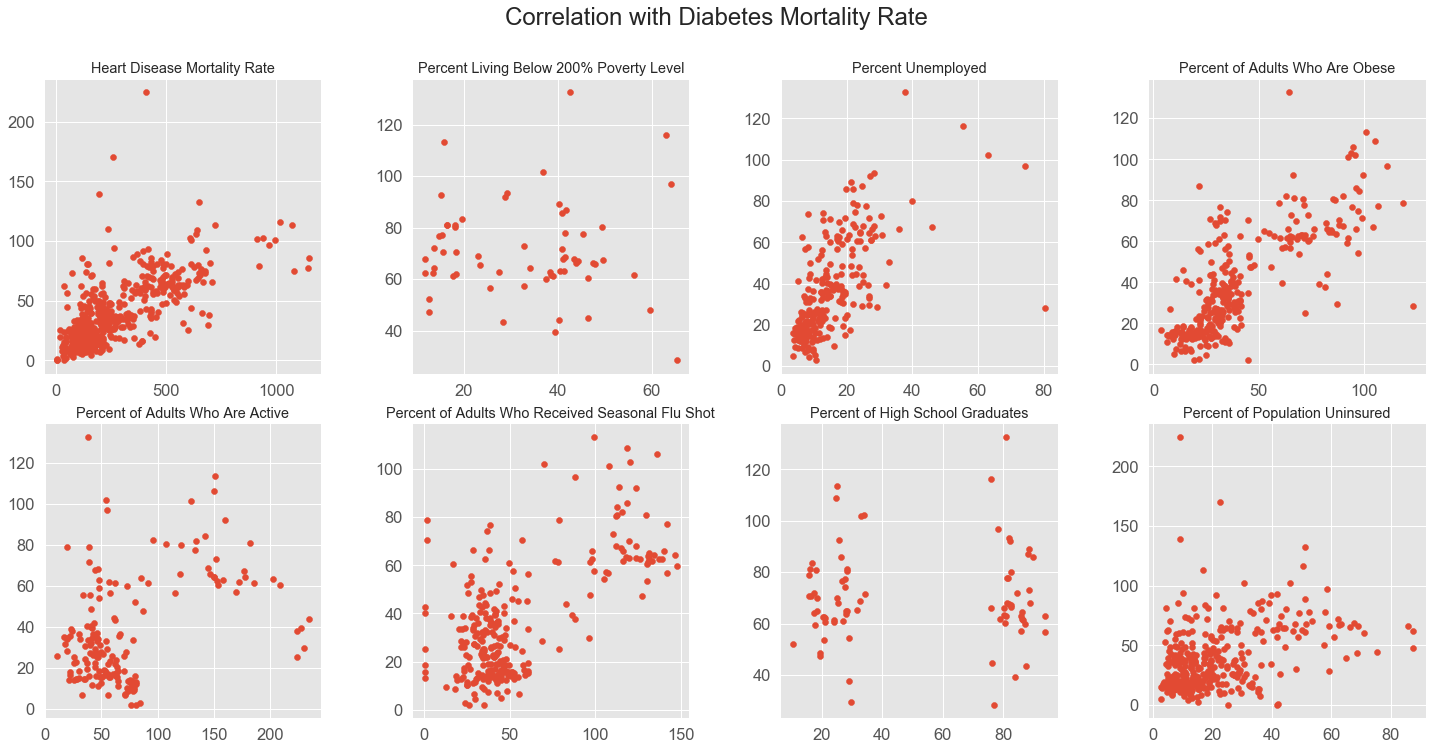

In [55]:
fig = plt.figure(figsize = (20,20))

for i in range(8):
    ax = fig.add_subplot(4,4,i+1)
    ax.scatter(df_pv[vars[i]], df_pv['Diabetes Mortality Rate'])
    ax.set_title(vars[i])

fig.tight_layout()
fig.subplots_adjust(top=0.93)
fig.suptitle('Correlation with Diabetes Mortality Rate', fontsize=24)
plt.show()

The scatter plots show some level correlation between the diabetes mortality rate and all variables except the population living below the poverty level and percent of high school graduates. The strongest correlation is between diabetes mortality and obesity. 

I also create a correlation heatmap to quantify the correlation between the variables.

In [56]:
corr = df_pv.corr()

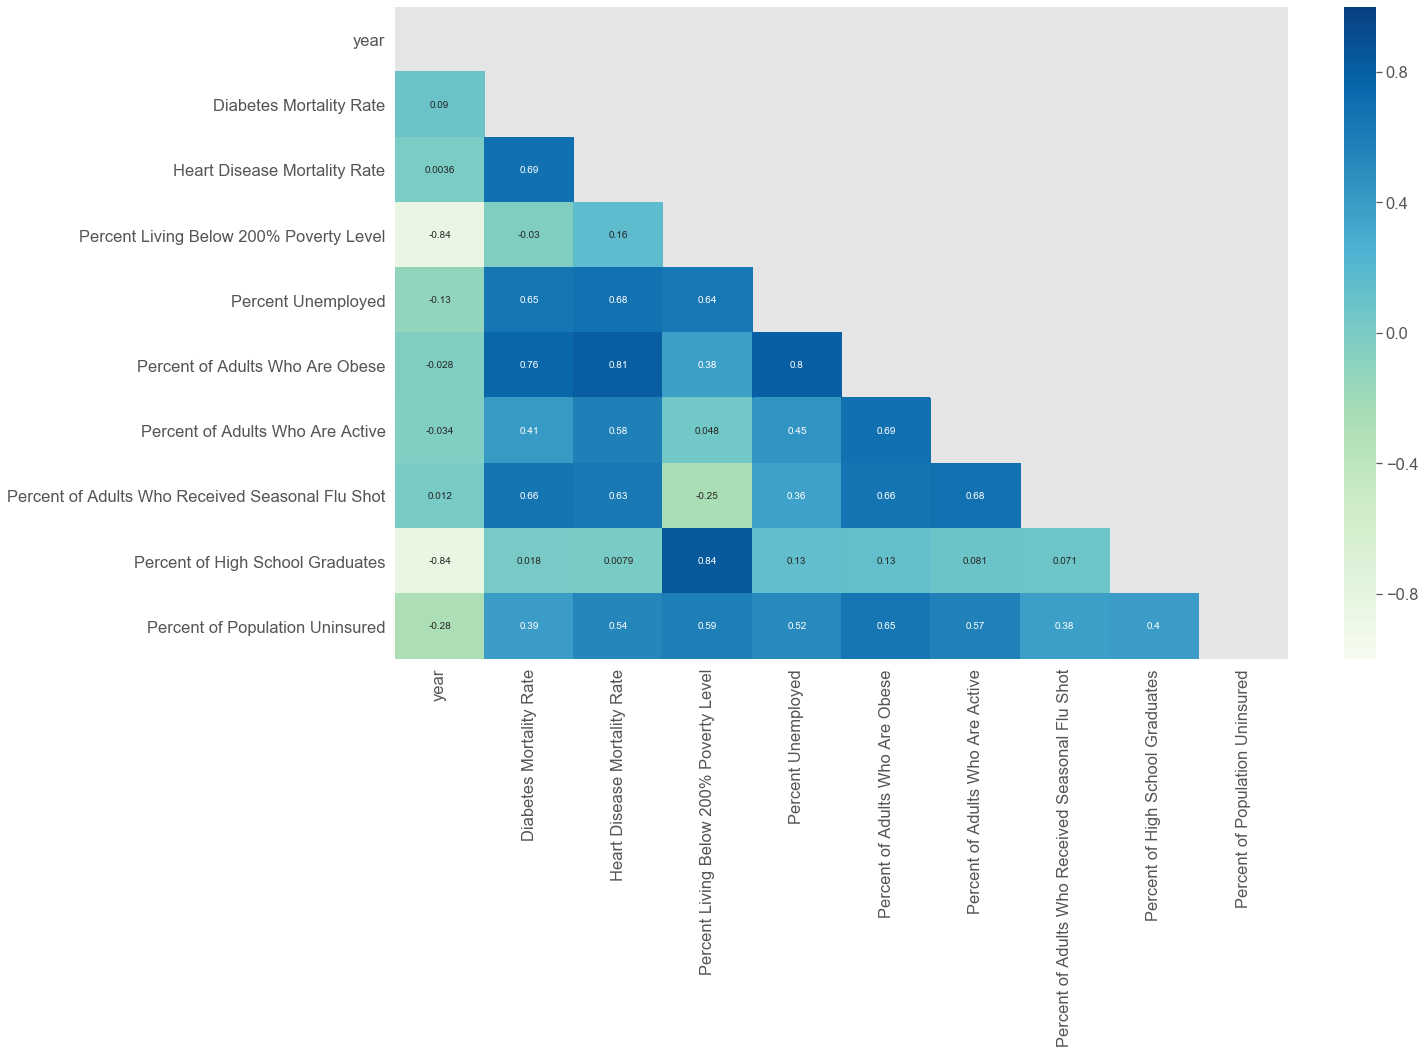

In [57]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,12))
sns.heatmap(corr,
            vmin=-1,
            cmap='GnBu',
            annot=True,
            mask = mask);

As expected, heart disease mortality and obesity are correlated with diabetes mortality. Unemployment also correlates with diabetes mortality rate, which could indicate that low income populations are more affected, or that people with severe diabetes are not able to work. Surprisingly the percent of adults who get a flu shot is also correlated, perhaps because older populations and populations with more illness are more susceptible to the flu so they are more likely to get the vaccine. 

Finally, I create the same scatter plots and heatmap for the Black population. 

In [58]:
df_black = df_pv[df_pv['race'] == 'Black']

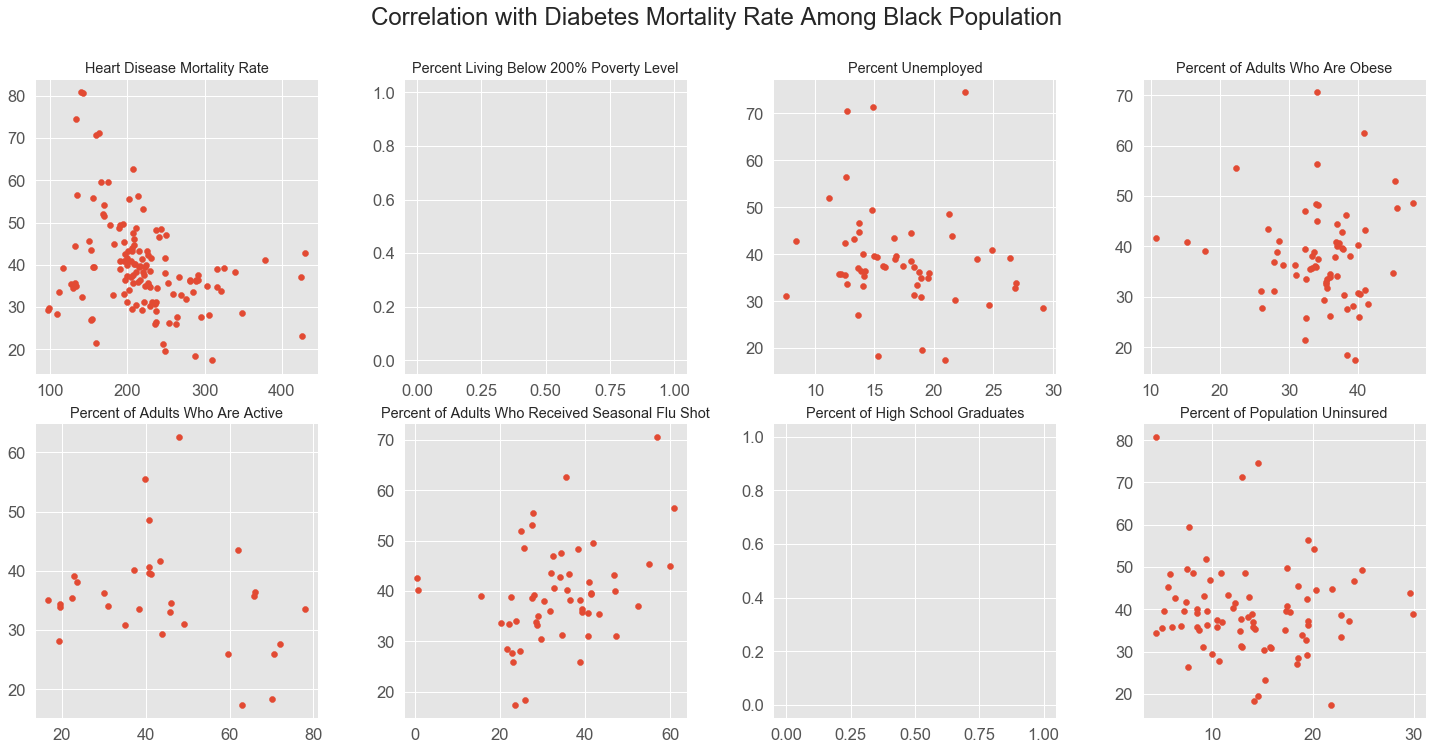

In [59]:
fig = plt.figure(figsize = (20,20))

for i in range(8):
    ax = fig.add_subplot(4,4,i+1)
    ax.scatter(df_black[vars[i]], df_black['Diabetes Mortality Rate'])
    ax.set_title(vars[i])
    
fig.tight_layout()
fig.subplots_adjust(top=0.93)
fig.suptitle('Correlation with Diabetes Mortality Rate Among Black Population', fontsize=24)
plt.show()

In [60]:
black_corr = df_black.corr()

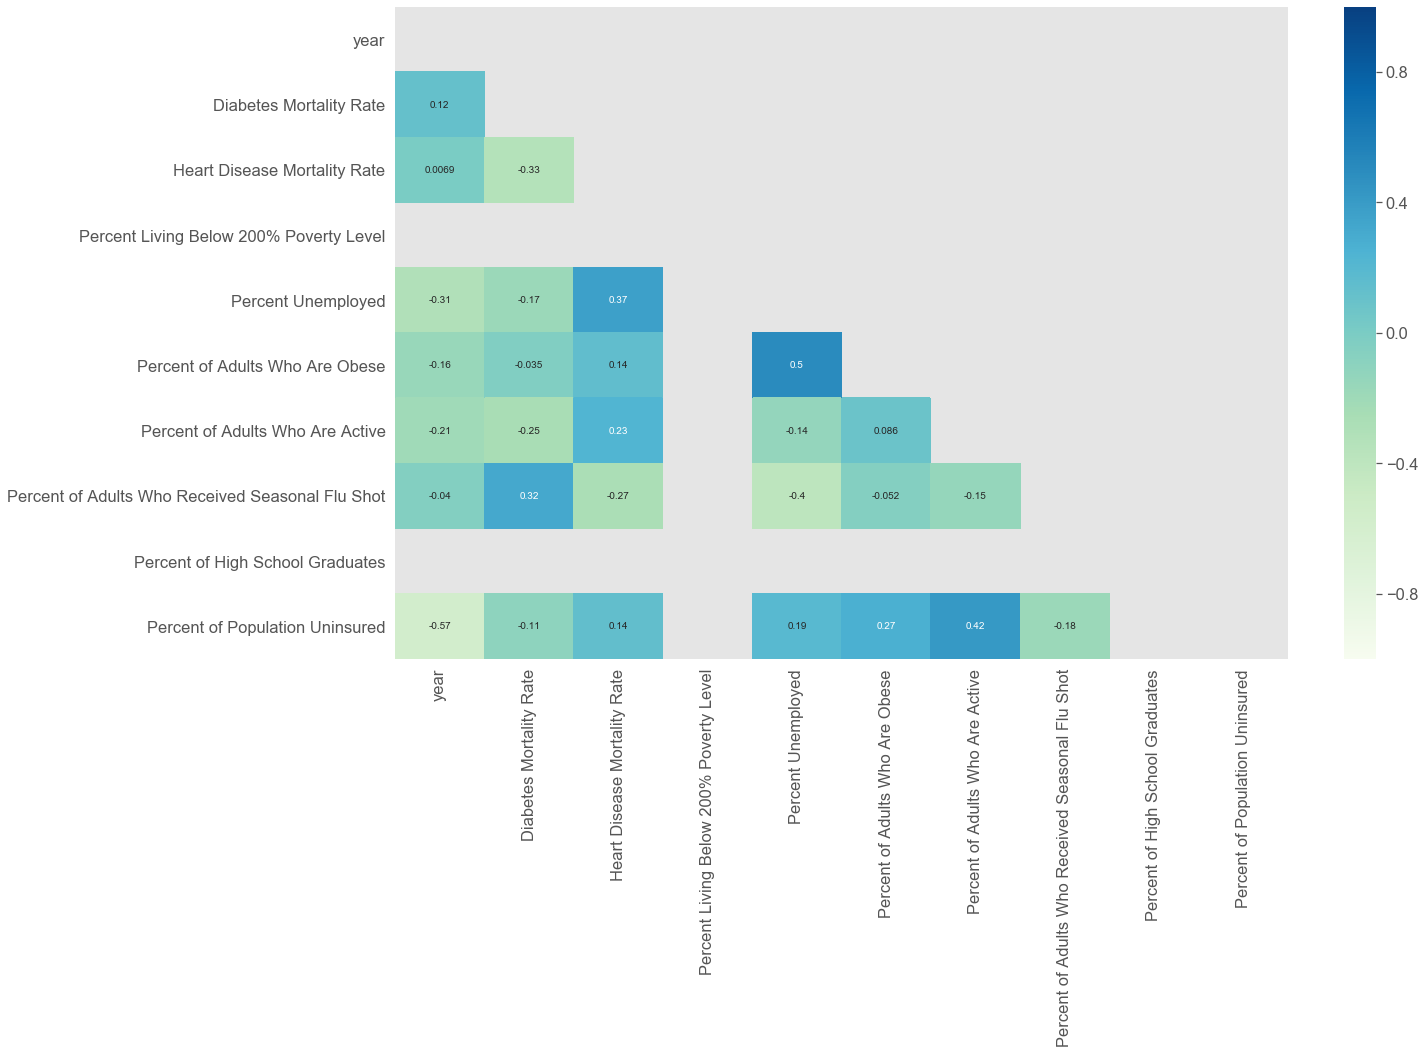

In [61]:
mask = np.zeros_like(black_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,12))
sns.heatmap(black_corr,
            vmin=-1,
            cmap='GnBu',
            annot=True,
            mask = mask);

While we see a weak correlation between diabetes mortality and obesity and the flu shot, most variables don't show a strong relationship only in this category. Perhaps this is due to a smaller sample size.  